In [20]:
#Importando as bibliotecaas
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [22]:
#Baixando a base de dados
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [24]:
#Nomeando as classes
class_names = ['Camiseta', 'Calças', 'Suéter', 'Vestido', 'Casaco',
               'Sandalha', 'Camisa', 'Tênis', 'Bolsa', 'Botas']

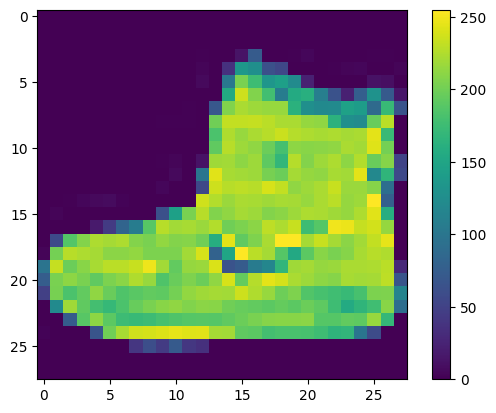

In [25]:
#Avaliando os pixels das imagens
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
#Normalizando os dados
train_images = train_images / 255.0
test_images = test_images / 255.0

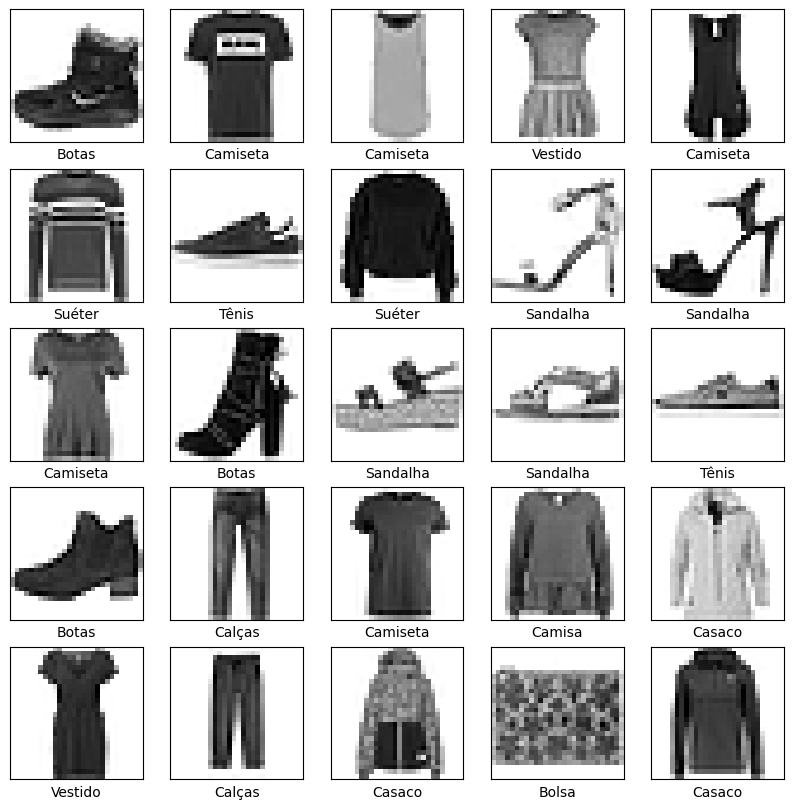

In [27]:
#Vizualiando os daoos
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [30]:
# Definir o modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4987 - accuracy: 0.8172 - val_loss: 0.3631 - val_accuracy: 0.8676
Epoch 2/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3181 - accuracy: 0.8837 - val_loss: 0.3068 - val_accuracy: 0.8877
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2729 - accuracy: 0.8990 - val_loss: 0.2971 - val_accuracy: 0.8925
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2448 - accuracy: 0.9086 - val_loss: 0.2696 - val_accuracy: 0.9010
Epoch 5/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2202 - accuracy: 0.9184 - val_loss: 0.2828 - val_accuracy: 0.8967
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2027 - accuracy: 0.9246 - val_loss: 0.2617 - val_accuracy: 0.9046
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1821 - accuracy: 0.9326 - val_loss: 0.2577 -

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.2803 - accuracy: 0.9099 - 2s/epoch - 7ms/step

Test accuracy: 0.9099000096321106


In [36]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

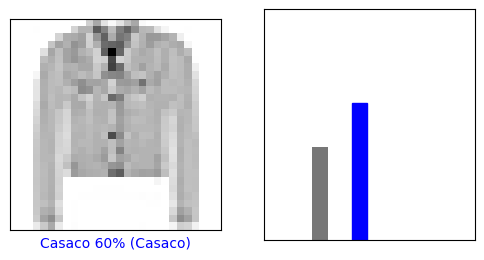

In [42]:
i = 1855
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

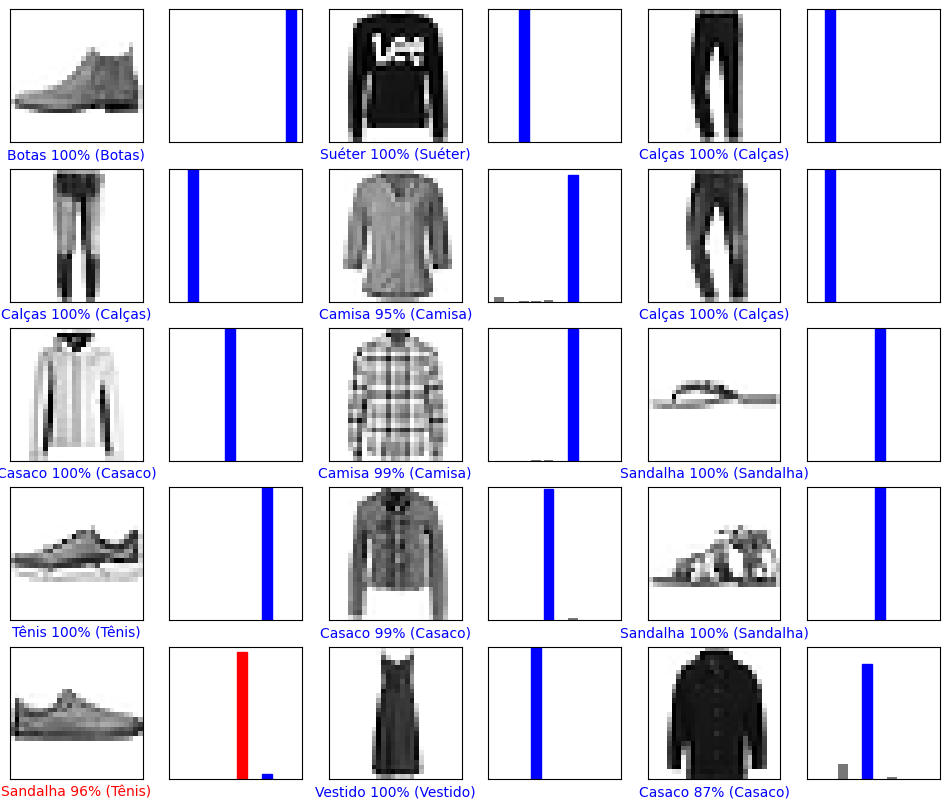

In [43]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [50]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 21ms/step
[[2.6397004e-10 7.9571219e-12 5.7645707e-13 2.4092508e-12 1.0501128e-13
  5.9442568e-06 9.3026357e-13 1.8643063e-06 5.2763922e-14 9.9999213e-01]]


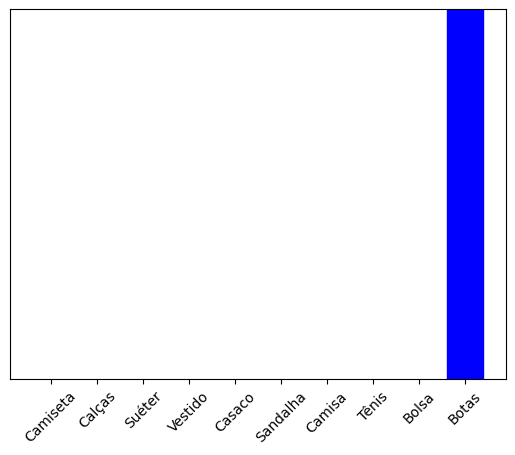

In [51]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [48]:
np.argmax(predictions_single[0])

9

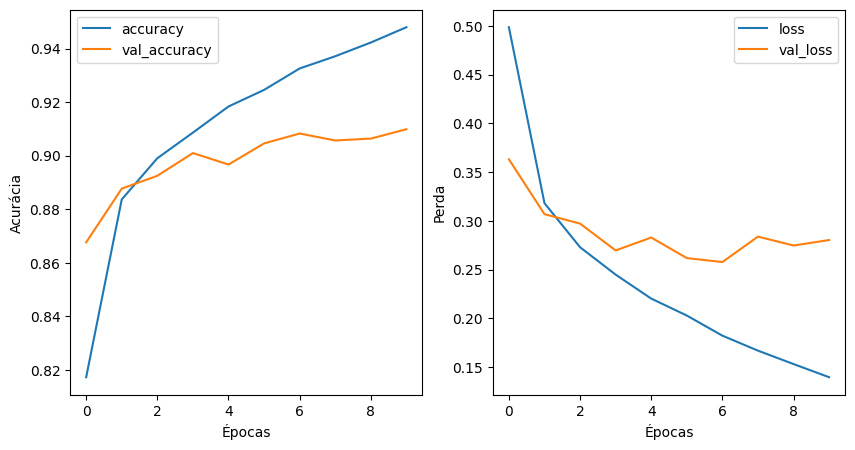

In [49]:
# Plotar a acurácia e a perda ao longo do treinamento
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()